<p style="text-align: center"><img src="https://gitlab.aicrowd.com/aicrowd/assets/-/raw/master/challenges/clock-decomposition/notebook-banner.jpg?inline=false" alt="Drawing" style="height: 400px;"/></p>

# What is the notebook about?

The challenge is to use the features extracted from the Clock Drawing Test to build an automated and algorithm to predict whether each participant is one of three phases:

1)    Pre-Alzheimer’s (Early Warning)
2)    Post-Alzheimer’s (Detection)
3)    Normal (Not an Alzheimer’s patient)

In machine learning terms: this is a 3-class classification task.

# How to use this notebook? 📝

- **Update the config parameters**. You can define the common variables here

Variable | Description
--- | ---
`AICROWD_DATASET_PATH` | Path to the file containing test data (The data will be available at `/ds_shared_drive/` on aridhia workspace). This should be an absolute path.
`AICROWD_PREDICTIONS_PATH` | Path to write the output to.
`AICROWD_ASSETS_DIR` | In case your notebook needs additional files (like model weights, etc.,), you can add them to a directory and specify the path to the directory here (please specify relative path). The contents of this directory will be sent to AIcrowd for evaluation.
`AICROWD_API_KEY` | In order to submit your code to AIcrowd, you need to provide your account's API key. This key is available at https://www.aicrowd.com/participants/me

- **Installing packages**. Please use the [Install packages 🗃](#install-packages-) section to install the packages
- **Training your models**. All the code within the [Training phase ⚙️](#training-phase-) section will be skipped during evaluation. **Please make sure to save your model weights in the assets directory and load them in the predictions phase section** 




# Content:
* **Exploratory Data Analysis**
* **Feature Engineering**
* **Hyper-parameter Optimization**
* **Training Best Parameters Model**
* **Final Prediction and submission**

### Introduction:
Hello I am Jyot Makadiya, a pre-final year student pursuing bachelor of technology in computer science & engineering. I have been experimenting with data for 1 year now and so far the journey has been smooth and I learned a lot on the way.                        
This challenge can be assumed to be a multiclass classification problem with 3 classes ( Normal, Pre-Alzheimer’s, Post-Alzheimer’s). The main tasks to achieve a good score include having a good cross-validation with balanced dataset, good feature engineering and Fine-tuning hyper-parameters along with ensembling. </br>                 
This notebook covers my approach for this competition starting with exploratory data analysis. Then it covers simple feature engineering for a few features (I'll expand the idea of FE and ensemble in next part/walkthrough blog). Finally we use Optuna for hyper-parameter optimization. </br>                 
The aim of this notebook is to introduce you with the variety of concepts including but not limited to hyper-parameter optimization aka AutoML tools, Simple but feature level EDA and FE.               
</br>
**For a better view of graphs and plots, open this notebook in colab using `open in colab` button**

# Setup AIcrowd Utilities 🛠

We use this to bundle the files for submission and create a submission on AIcrowd. Do not edit this block.

In [ ]:
!pip install -q -U aicrowd-cli

In [ ]:
%load_ext aicrowd.magic

# AIcrowd Runtime Configuration 🧷

Define configuration parameters. Please include any files needed for the notebook to run under `ASSETS_DIR`. We will copy the contents of this directory to your final submission file 🙂

The dataset is available under `/ds_shared_drive` on the workspace.

In [ ]:
import os

# Please use the absolute for the location of the dataset.
# Or you can use relative path with `os.getcwd() + "test_data/validation.csv"`
AICROWD_DATASET_PATH = os.getenv("DATASET_PATH", "Z:/challenge-data/validation.csv")
AICROWD_PREDICTIONS_PATH = os.getenv("PREDICTIONS_PATH", "Z:/challenge-data/predictions.csv")
AICROWD_ASSETS_DIR = "assets"


# Install packages 🗃

Please add all pacakage installations in this section

In [ ]:
!pip install -q numpy pandas

In [ ]:
!pip install -q xgboost scikit-learn seaborn lightgbm optuna

# Define preprocessing code 💻

The code that is common between the training and the prediction sections should be defined here. During evaluation, we completely skip the training section. Please make sure to add any common logic between the training and prediction sections here.

### Import common packages

Please import packages that are common for training and prediction phases here.

In [ ]:
import xgboost as xgb
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
sns.color_palette("rocket_r")
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, log_loss, f1_score
import joblib

import warnings
warnings.filterwarnings("ignore")
# df
# with open(AICROWD_DATASET_PATH) as f:
#     f.read()
# some precessing code

In [ ]:
# os.listdir('Z:/challenge-data/')
#Pre Processing functions




# Training phase ⚙️

You can define your training code here. This sections will be skipped during evaluation.

In [ ]:
# model = define_your_model

## Load training data

In [ ]:
df_orig = pd.read_csv("Z:/challenge-data/train.csv")

df_valid = pd.read_csv("Z:/challenge-data/validation.csv")
df_valid_target = pd.read_csv("Z:/challenge-data/validation_ground_truth.csv")
df = df_orig.copy()
df.describe()

,number_of_digits,missing_digit_1,missing_digit_2,missing_digit_3,missing_digit_4,missing_digit_5,missing_digit_6,missing_digit_7,missing_digit_8,missing_digit_9,missing_digit_10,missing_digit_11,missing_digit_12,1 dist from cen,10 dist from cen,11 dist from cen,12 dist from cen,2 dist from cen,3 dist from cen,4 dist from cen,5 dist from cen,6 dist from cen,7 dist from cen,8 dist from cen,9 dist from cen,euc_dist_digit_1,euc_dist_digit_2,euc_dist_digit_3,euc_dist_digit_4,euc_dist_digit_5,euc_dist_digit_6,euc_dist_digit_7,euc_dist_digit_8,euc_dist_digit_9,euc_dist_digit_10,euc_dist_digit_11,euc_dist_digit_12,area_digit_1,area_digit_2,area_digit_3,area_digit_4,area_digit_5,area_digit_6,area_digit_7,area_digit_8,area_digit_9,area_digit_10,area_digit_11,area_digit_12,height_digit_1,height_digit_2,height_digit_3,height_digit_4,height_digit_5,height_digit_6,height_digit_7,height_digit_8,height_digit_9,height_digit_10,height_digit_11,height_digit_12,width_digit_1,width_digit_2,width_digit_3,width_digit_4,width_digit_5,width_digit_6,width_digit_7,width_digit_8,width_digit_9,width_digit_10,width_digit_11,width_digit_12,variance_width,variance_height,variance_area,deviation_dist_from_mid_axis,between_axis_digits_angle_sum,between_axis_digits_angle_var,between_digits_angle_cw_sum,between_digits_angle_cw_var,between_digits_angle_ccw_sum,between_digits_angle_ccw_var,sequence_flag_cw,sequence_flag_ccw,number_of_hands,hand_count_dummy,hour_hand_length,minute_hand_length,single_hand_length,clockhand_ratio,clockhand_diff,angle_between_hands,deviation_from_centre,hour_proximity_from_11,minute_proximity_from_2,hour_pointing_digit,actual_hour_digit,minute_pointing_digit,actual_minute_digit,final_rotation_angle,ellipse_circle_ratio,count_defects,percentage_inside_ellipse,pred_tremor,double_major,double_minor,vertical_dist,horizontal_dist,top_area_perc,bottom_area_perc,left_area_perc,right_area_perc,hor_count,vert_count,eleven_ten_error,other_error,time_diff,centre_dot_detect
count,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,25448.000000,27882.000000,27201.000000,28937.000000,27855.000000,28612.000000,27251.000000,26092.000000,28407.000000,28555.000000,28755.000000,26974.000000,25400.000000,27800.000000,28603.000000,27238.000000,26082.000000,28394.000000,28491.000000,28641.000000,2.693600e+04,27838.000000,27151.000000,28909.000000,25448.000000,27855.000000,28612.000000,27251.000000,26092.000000,28407.000000,28555.000000,28755.000000,26974.000000,27882.000000,27201.000000,28937.000000,25448.000000,27855.000000,28612.000000,27251.000000,26092.000000,28407.000000,28555.000000,28755.000000,26974.000000,27882.000000,27201.000000,28937.000000,25448.000000,27855.000000,28612.000000,27251.000000,26092.000000,28407.000000,28555.000000,28755.000000,26974.000000,27882.000000,27201.000000,28937.000000,32313.000000,32313.000000,3.231300e+04,32198.000000,29141.000000,30870.000000,20027.000000,32085.000000,844.000000,32085.000000,32474.000000,32474.000000,30623.000000,30623.000000,22861.000000,22861.000000,7741.000000,22650.000000,22835.000000,22861.000000,22793.000000,20191.000000,19919.000000,22677.000000,32777.0,22678.000000,32777.0,32703.000000,3.203900e+04,32777.000000,32472.000000,32777.000000,32540.000000,3.277600e+04,3.258900e+04,3.273500e+04,31218.000000,31218.000000,31218.000000,31218.000000,32777.000000,32777.000000,32777.000000,32777.000000,22526.000000,22826.000000
mean,10.299422,0.221845,0.148243,0.125096,0.166713,0.202153,0.131364,0.126839,0.120723,0.175183,0.147418,0.168241,0.115158,361.869732,367.418424,368.235873,370.796838,349.116177,337.542587,336.085919,335.550313,353.017822,368.547709,370.329200,375.631690,30.287315,32.834984,33.031035,32.049520,30.724226,28.135344,30.886070,32.250843,3.125026e+01,33.247571,32.644335,28.629239,2308.107671,4616.101562,5046.115231,5793.115665,7214.179250,6035.063259,4942.821748,5697.2033

In [ ]:
# list(df.columns)

# Exploratory Data Analysis

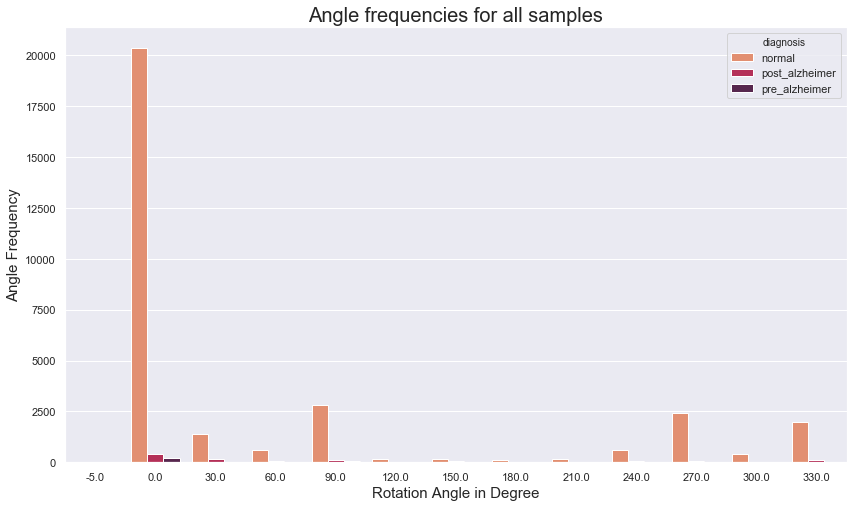

In [ ]:
# Final Rotation Angle in degrees

feat_col = df['final_rotation_angle']
feat_col.fillna(-5,inplace=True)
plt.figure(figsize=(14,8))
fig = sns.countplot(x = 'final_rotation_angle',data=df, palette='rocket_r', hue='diagnosis')
fig.set_xlabel("Rotation Angle in Degree",size=15)
fig.set_ylabel("Angle Frequency",size=15)
plt.title('Angle frequencies for all samples',size = 20)
plt.show()

We can notice that there are only 13 discrete values in rotation angles, instead of using these, we can resample that to 4 different columns each representing 90 degrees range or 1 quarter of circle angles.

In [ ]:
print(f"number of unique values for rotation angles: {feat_col.nunique()}")

#now we can change that to 4 different quarters columns
df['rotation_angle_90'] = (feat_col <= 90).astype('int')    #we will also include NaN in this column
df['rotation_angle_180'] = (90 < feat_col) & (feat_col <= 180).astype('int') 
df['rotation_angle_270'] = (180 < feat_col) & (feat_col <= 270).astype('int') 
df['rotation_angle_360'] = (feat_col > 270).astype('int')   

#We care not using this currently instead we will use two columns for below 180 and above 180

number of unique values for rotation angles: 13


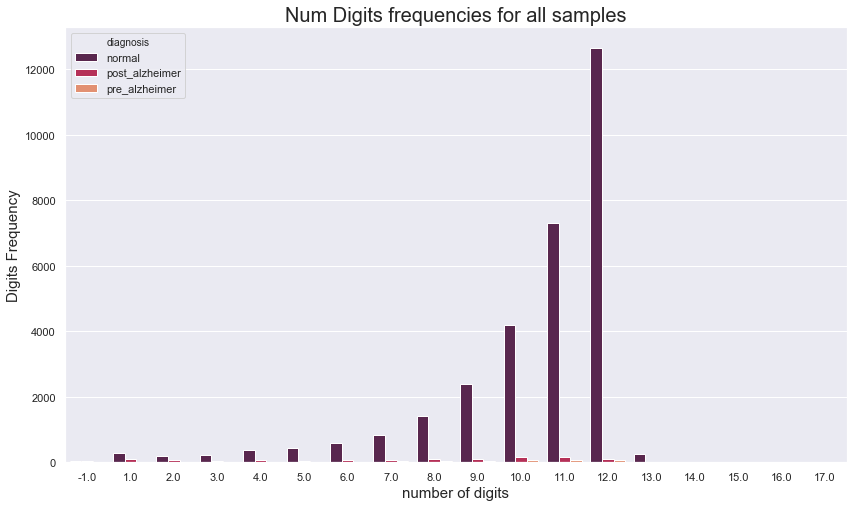

In [ ]:
# number of digits 
feat_col = df['number_of_digits']
feat_col.fillna(-1,inplace=True)
plt.figure(figsize=(14,8))
fig = sns.countplot(data=df, x="number_of_digits",palette='rocket', hue="diagnosis" )
fig.set_xlabel("number of digits",size=15)
fig.set_ylabel("Digits Frequency",size=15)
plt.title('Num Digits frequencies for all samples',size = 20)
plt.show()

In [ ]:
print(f"number of unique values for number digits: {df['number_of_digits'].nunique()}")

number of unique values for number digits: 18


We can notice that most of the values lie in 10,11,12 count range which is good indicator for large normal part of our dataset. And so maybe a new feature with either 10 or 11 or 12 true maybe useful

<Figure size 432x288 with 0 Axes>

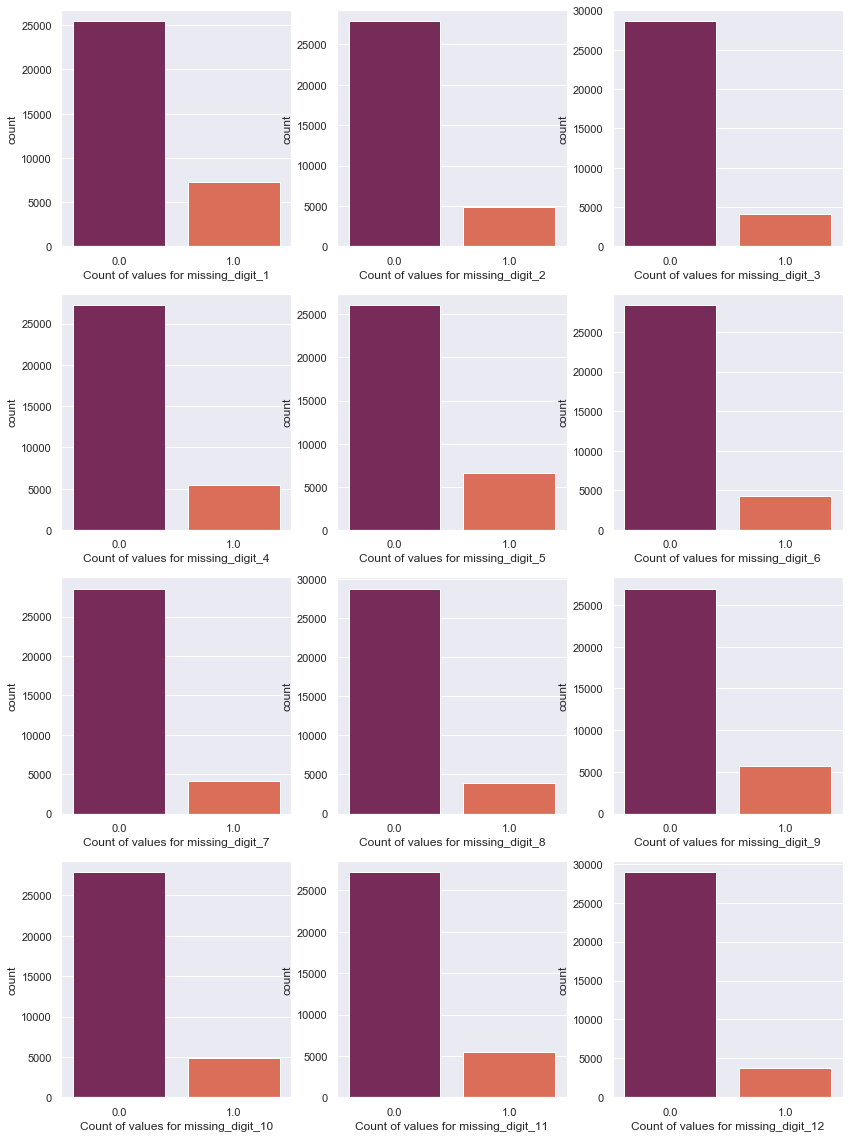

In [ ]:
#Let's look at some of the features with categorical values of repeating multiple instances
#For missing Digit values
plt.figure()
fig, ax = plt.subplots(4, 3,figsize=(14, 20))
cont_features = [f"missing_digit_{i}" for i in range(1,13)]
for i,feature in enumerate(cont_features):
    plt.subplot(4, 3,i+1)
    sns.countplot(data=df, x=feature,palette='rocket' )
    plt.xlabel(f"Count of values for {feature}", fontsize=12);# plt.legend()
plt.show()

The ratio is same for almost all the digits with around 5000 values being missing. We can notice the large portion in missing_digit_1 & missing_digit_5 variable

<Figure size 432x288 with 0 Axes>

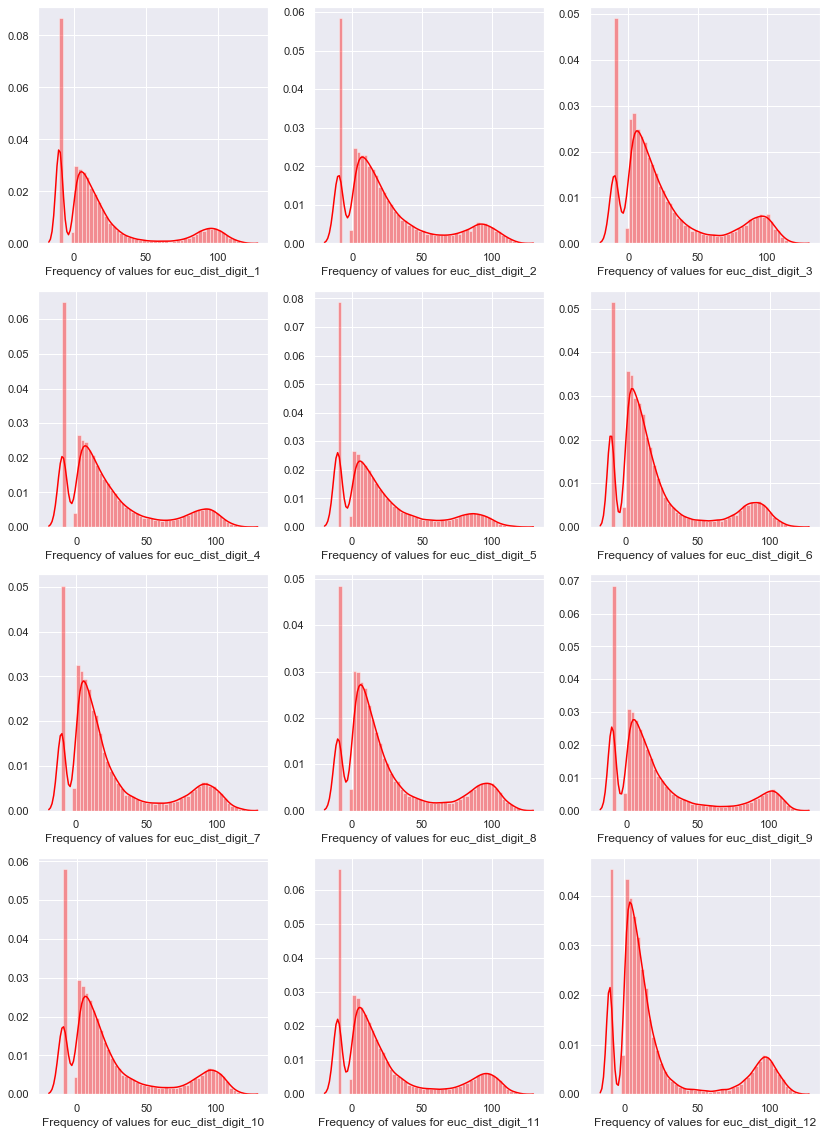

In [ ]:
#Let's look at Euclidean distance from digits 
#this feature can be calculated using Euclidean distance forumula for ideal and found digit positions with sqrt(a^2+b^2)

plt.figure()
fig, ax = plt.subplots(4, 3,figsize=(14, 20))
cont_features = [f"euc_dist_digit_{i}" for i in range(1,13)]
for i,feature in enumerate(cont_features):
    plt.subplot(4, 3,i+1)
    df[feature].fillna(-10,inplace=True)
    sns.distplot(df[feature] , color='Red')
    plt.xlabel(f"Frequency of values for {feature}", fontsize=12);# plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

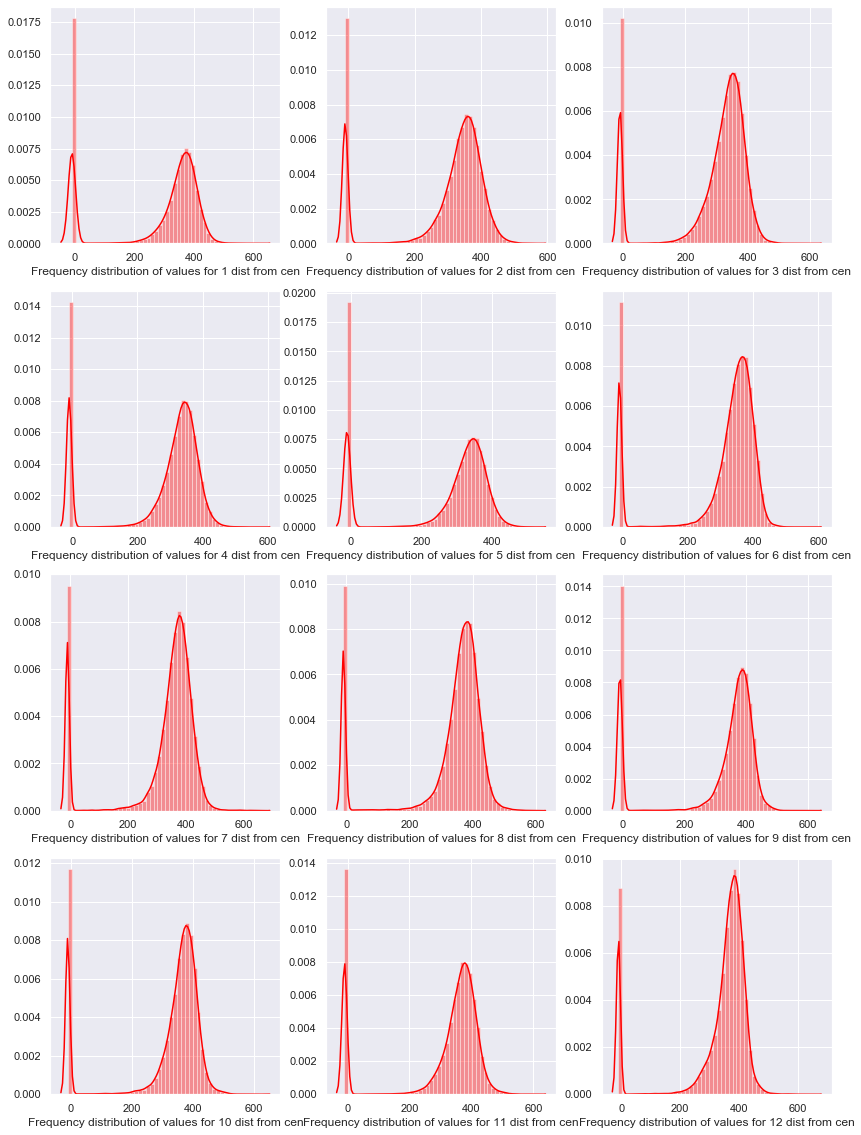

In [ ]:
#Let's look at Euclidean distance from center(512,512) to digits 
#this feature can be calculated using Euclidean distance forumula for ideal and found digit positions with sqrt(a^2+b^2)

plt.figure()
fig, ax = plt.subplots(4, 3,figsize=(14, 20))
cont_features = [f"{i} dist from cen" for i in range(1,13)]
for i,feature in enumerate(cont_features):
    plt.subplot(4, 3,i+1)
    df[feature].fillna(-10,inplace=True)
    sns.distplot(df[feature] , color='Red')
    plt.xlabel(f"Frequency distribution of values for {feature}", fontsize=12);# plt.legend()
plt.show()

The distribution seems to have variance around 200 with balanced gaussian distribution. Another thing to notice is that there are a lot of missing values in those variables.

<Figure size 432x288 with 0 Axes>

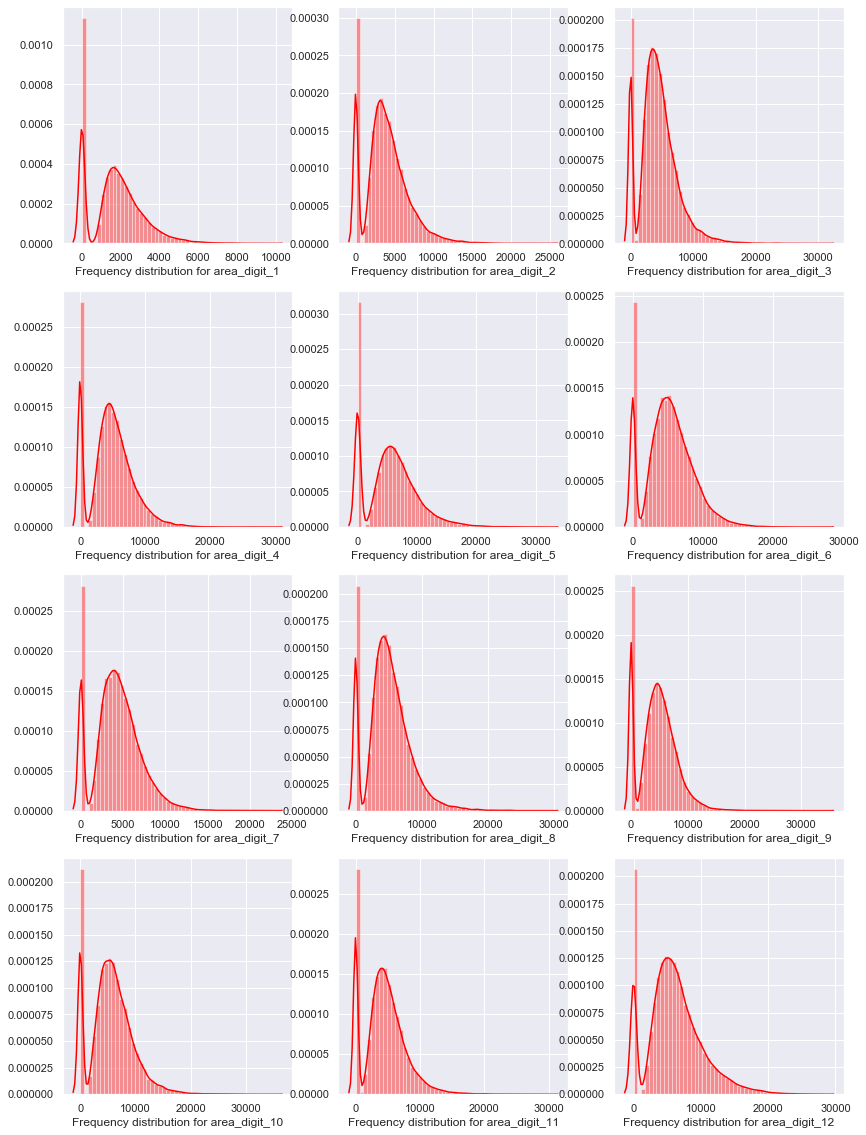

In [ ]:
#Next set of variables are area for each digit bounding boxes

plt.figure()
fig, ax = plt.subplots(4, 3,figsize=(14, 20))
cont_features = [f"area_digit_{i}" for i in range(1,13)]
for i,feature in enumerate(cont_features):
    plt.subplot(4, 3,i+1)
    df[feature].fillna(-1,inplace=True)
    sns.distplot(df[feature] , color='Red')
    plt.xlabel(f"Frequency distribution for {feature}", fontsize=12);# plt.legend()
plt.show()

We can notice the distributions have large variance and the distributions seem to be skewed. We may use some feature engineering to mkae it right.

<Figure size 432x288 with 0 Axes>

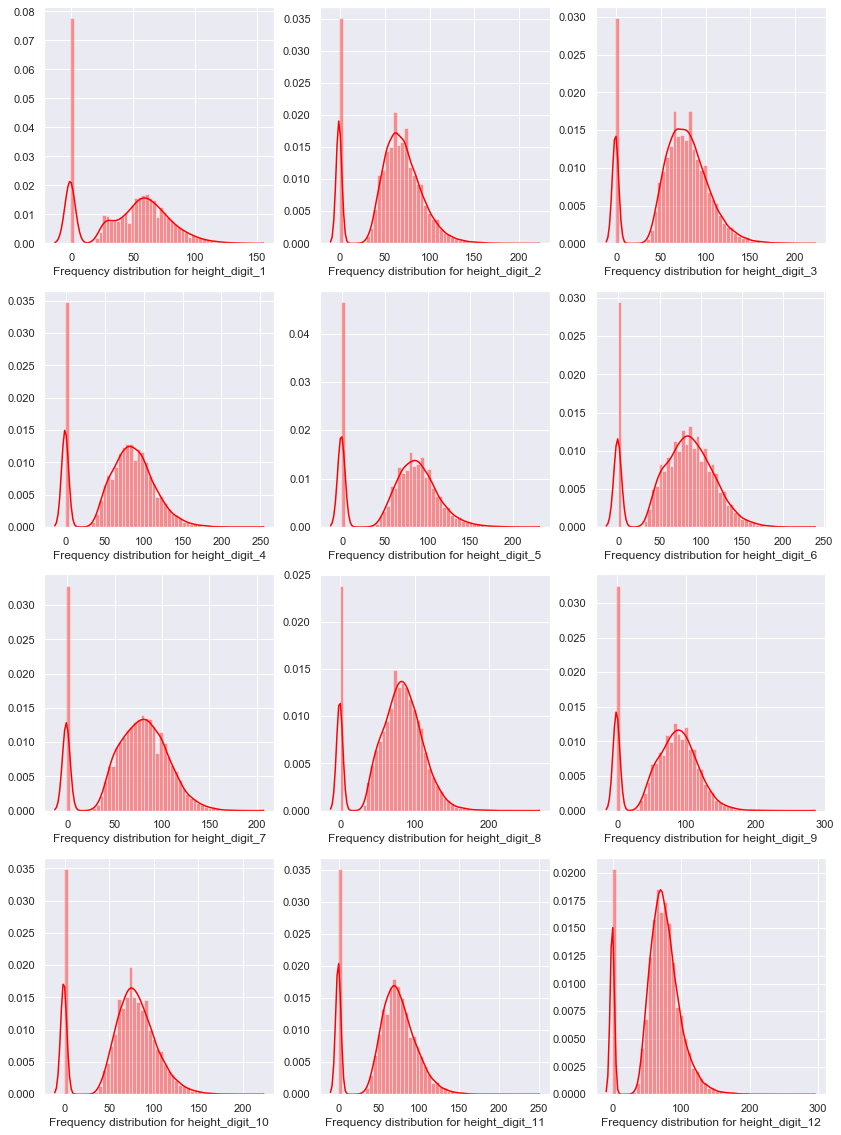

In [ ]:
#Next set of variables are height of each digit bounding boxes

plt.figure()
fig, ax = plt.subplots(4, 3,figsize=(14, 20))
cont_features = [f"height_digit_{i}" for i in range(1,13)]
for i,feature in enumerate(cont_features):
    plt.subplot(4, 3,i+1)
    df[feature].fillna(-1,inplace=True)
    sns.distplot(df[feature] , color='Red')
    plt.xlabel(f"Frequency distribution for {feature}", fontsize=12);# plt.legend()
plt.show()

There is a lot of variance in height of bounding boxes. This may explain the different sizes of bounding boxes as we can see the size will be diferent for some digits and 11, 12.

<Figure size 432x288 with 0 Axes>

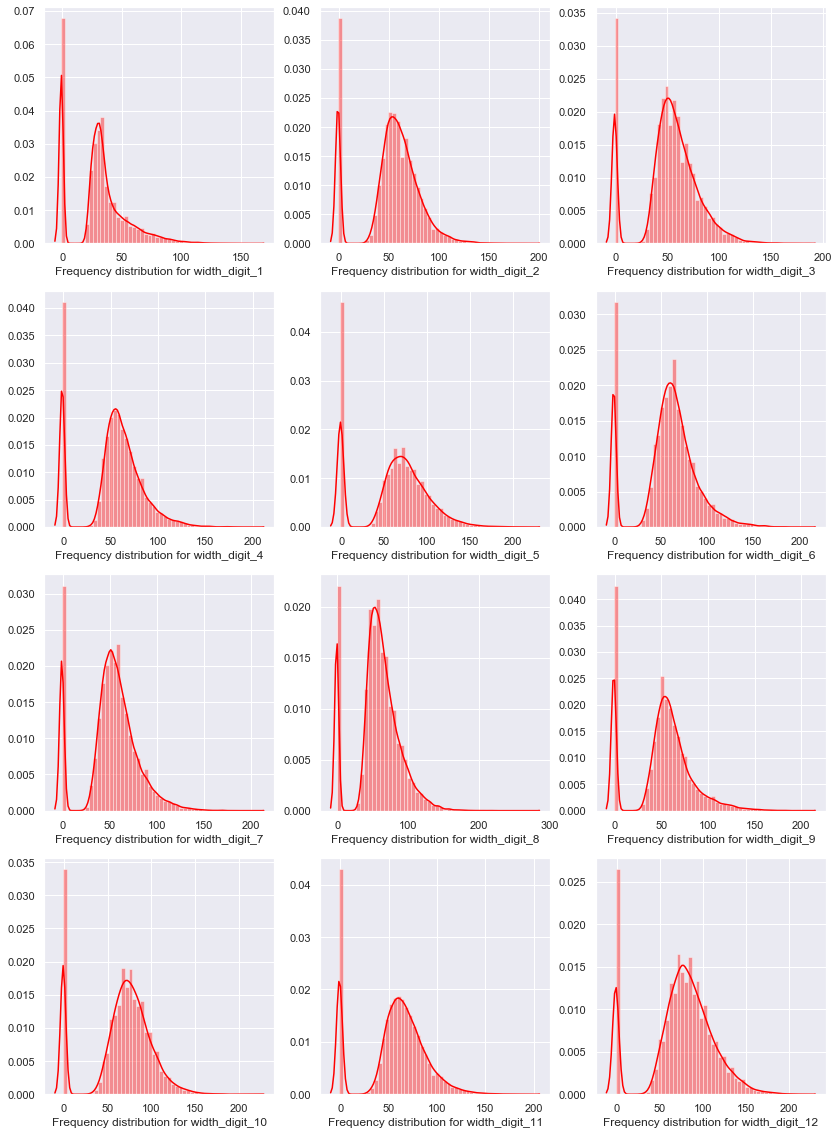

In [ ]:
#Next set of variables are width for each digit bounding boxes

plt.figure()
fig, ax = plt.subplots(4, 3,figsize=(14, 20))
cont_features = [f"width_digit_{i}" for i in range(1,13)]
for i,feature in enumerate(cont_features):
    plt.subplot(4, 3,i+1)
    df[feature].fillna(-1,inplace=True)
    sns.distplot(df[feature] , color='Red')
    plt.xlabel(f"Frequency distribution for {feature}", fontsize=12); # plt.legend()
plt.show()

Again we can notice some skewness and a large portion of missing values inside variables. The variance is also different for most of the variables.

<Figure size 432x288 with 0 Axes>

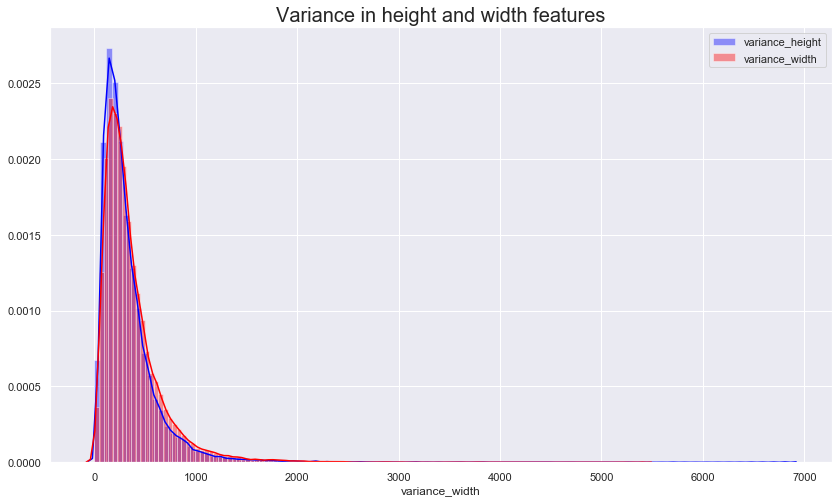

In [ ]:
# we will look into the varinace of features distribution of width and height now, to get insight into the data
plt.figure()
fig, ax = plt.subplots(1, 1,figsize=(14, 8))
sns.distplot(df['variance_height'],color="blue", kde=True,bins=120, label='variance_height')
sns.distplot(df['variance_width'],color="red", kde=True,bins=120, label='variance_width')
# sns.distplot(df['variance_area'],color="green", kde=True,bins=120, label='variance_area')
plt.title('Variance in height and width features',size = 20)
plt.legend()
plt.show()

Surprisingly, they are almost identical which is good as we can atleast know there is good correlation with height and width variables. Another thing to notice is that we can extract area variable by multiplying height and width features as area = H*W for a bounding box. (Sadly we can't get the missing values in Area from H & W as they are also missing in both other variables)

<Figure size 432x288 with 0 Axes>

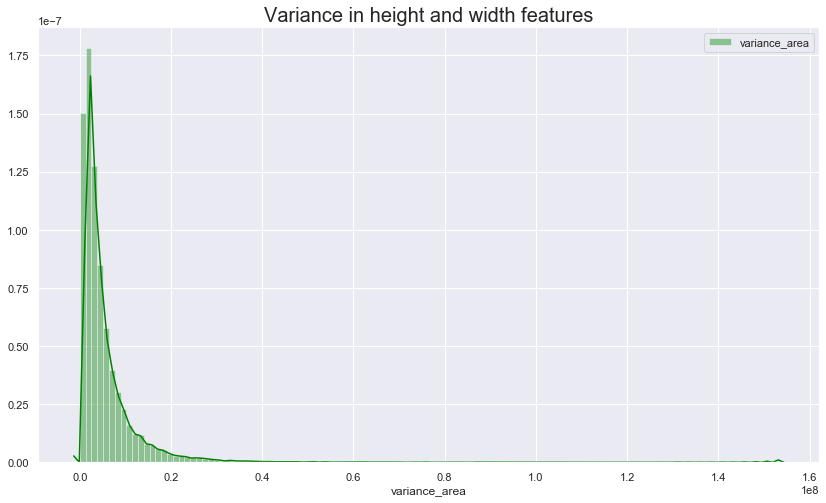

In [ ]:
# we will look into the varinace of area, to get insight into the data
plt.figure()
fig, ax = plt.subplots(1, 1,figsize=(14, 8))
sns.distplot(df['variance_area'],color="green", kde=True,bins=120, label='variance_area')
plt.title('Variance in height and width features',size = 20)
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

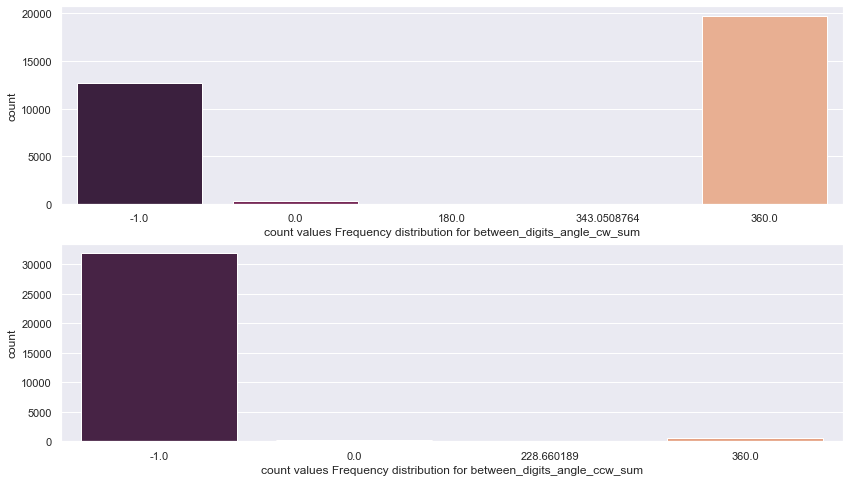

In [ ]:
#Next set of variables are Angle calculated as counterclockwise and clockwise sum,variance

plt.figure()
fig, ax = plt.subplots(2, 1,figsize=(14, 8))
cont_features = ['between_digits_angle_cw_sum','between_digits_angle_ccw_sum']
for i,feature in enumerate(cont_features):
    plt.subplot(2, 1,i+1)
    df[feature].fillna(-1,inplace=True)
    sns.countplot(data=df, x=feature,palette='rocket')
    plt.xlabel(f"count values Frequency distribution for {feature}", fontsize=12); # plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

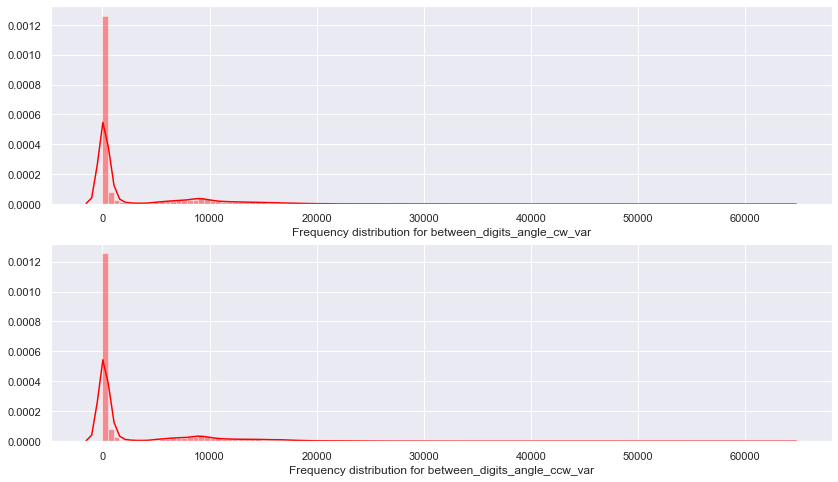

In [ ]:
#same with variance variable 

plt.figure()
fig, ax = plt.subplots(2, 1,figsize=(14, 8))
cont_features = ['between_digits_angle_cw_sum','between_digits_angle_ccw_sum']
for i,feature in enumerate(cont_features):
    plt.subplot(2, 1,i+1)
    df[feature].fillna(-1,inplace=True)
#     sns.distplot(df[feature],color="blue", kde=True,bins=120, label='sum')
    sns.distplot(df[feature.replace('sum','var')],color="red", kde=True,bins=120, label='var')
    plt.xlabel(f"Frequency distribution for {feature.replace('sum','var')}", fontsize=12); # plt.legend()
plt.show()

Majority of above values are concentrated at value 0 in both the cases in variance, that indicates the presence of very precise data or large number of missing values which we can confirm from Sum countplot.

In [ ]:
features = df_orig.columns[1:-1].to_list()
for f in features:
    print(f" {f} is having : {df[f].nunique()} distinct values")

 number_of_digits is having : 18 distinct values
 missing_digit_1 is having : 2 distinct values
 missing_digit_2 is having : 2 distinct values
 missing_digit_3 is having : 2 distinct values
 missing_digit_4 is having : 2 distinct values
 missing_digit_5 is having : 2 distinct values
 missing_digit_6 is having : 2 distinct values
 missing_digit_7 is having : 2 distinct values
 missing_digit_8 is having : 2 distinct values
 missing_digit_9 is having : 2 distinct values
 missing_digit_10 is having : 2 distinct values
 missing_digit_11 is having : 2 distinct values
 missing_digit_12 is having : 2 distinct values
 1 dist from cen is having : 21148 distinct values
 10 dist from cen is having : 22765 distinct values
 11 dist from cen is having : 22258 distinct values
 12 dist from cen is having : 21357 distinct values
 2 dist from cen is having : 22905 distinct values
 3 dist from cen is having : 23065 distinct values
 4 dist from cen is having : 22437 distinct values
 5 dist from cen is havi

<Figure size 432x288 with 0 Axes>

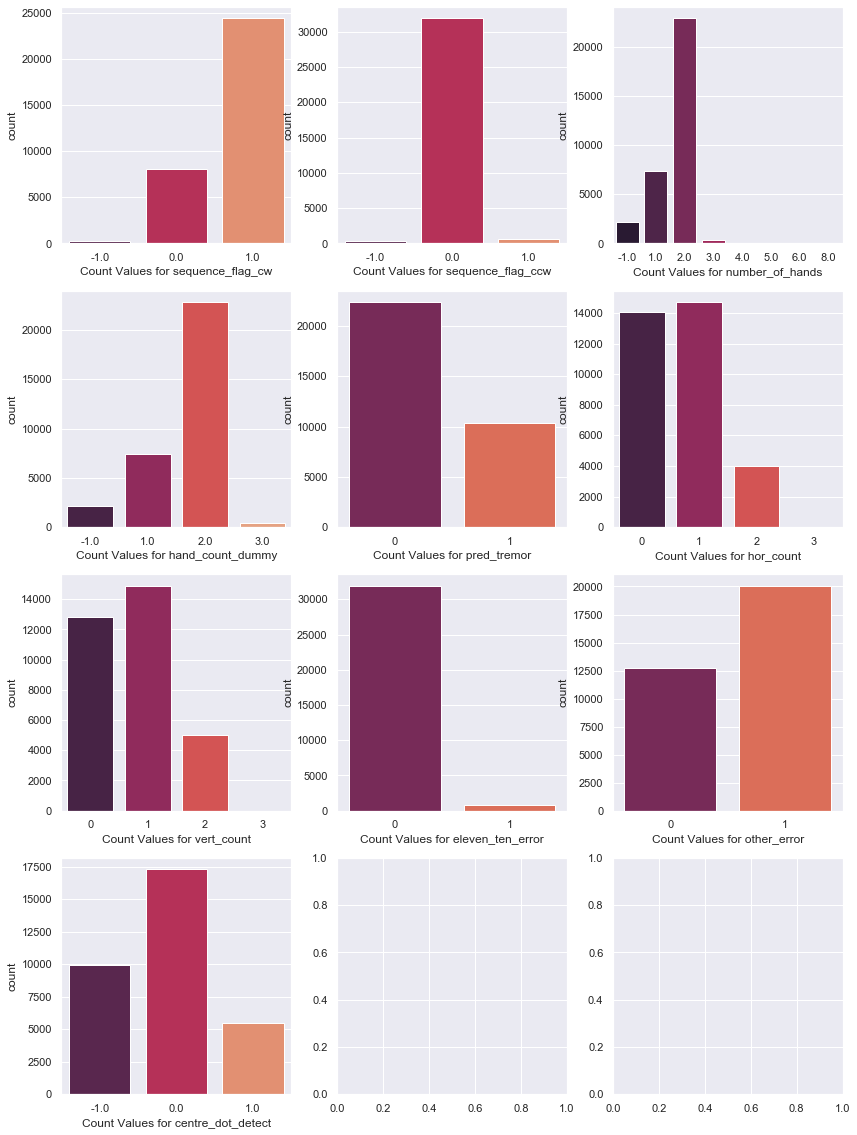

In [ ]:
#Now we will take a look at how the different categorical features with only a few values hold as an countplot distribution

plt.figure()
fig, ax = plt.subplots(4, 3,figsize=(14, 20))
cont_features = ['sequence_flag_cw',
 'sequence_flag_ccw',
 'number_of_hands',
 'hand_count_dummy',
 'pred_tremor',
 'hor_count',
 'vert_count',
 'eleven_ten_error',
 'other_error',
 'centre_dot_detect']
for i,feature in enumerate(cont_features):
    plt.subplot(4,3,i+1)
    df[feature].fillna(-1,inplace=True)
    sns.countplot(data=df, x=feature,palette='rocket')
    plt.xlabel(f"Count Values for {feature}", fontsize=12); # plt.legend()
plt.show()


The above count plots explain all the categorical values with categories less than 7. we can already see some odd patterns in `hand_count_dummy` and `number_of_hands`. Upon further checking the abnormal values (greater than 2) seem to come from `normal` diagnosis labels.  

In [ ]:
#check the null values in training data
print(f" Training data has Null values : {df_orig.isnull().sum()}")

 Training data has Null values : row_id                               0
number_of_digits                    74
missing_digit_1                     74
missing_digit_2                     74
missing_digit_3                     74
missing_digit_4                     74
missing_digit_5                     74
missing_digit_6                     74
missing_digit_7                     74
missing_digit_8                     74
missing_digit_9                     74
missing_digit_10                    74
missing_digit_11                    74
missing_digit_12                    74
1 dist from cen                   7329
10 dist from cen                  4895
11 dist from cen                  5576
12 dist from cen                  3840
2 dist from cen                   4922
3 dist from cen                   4165
4 dist from cen                   5526
5 dist from cen                   6685
6 dist from cen                   4370
7 dist from cen                   4222
8 dist from cen                

<Figure size 432x288 with 0 Axes>

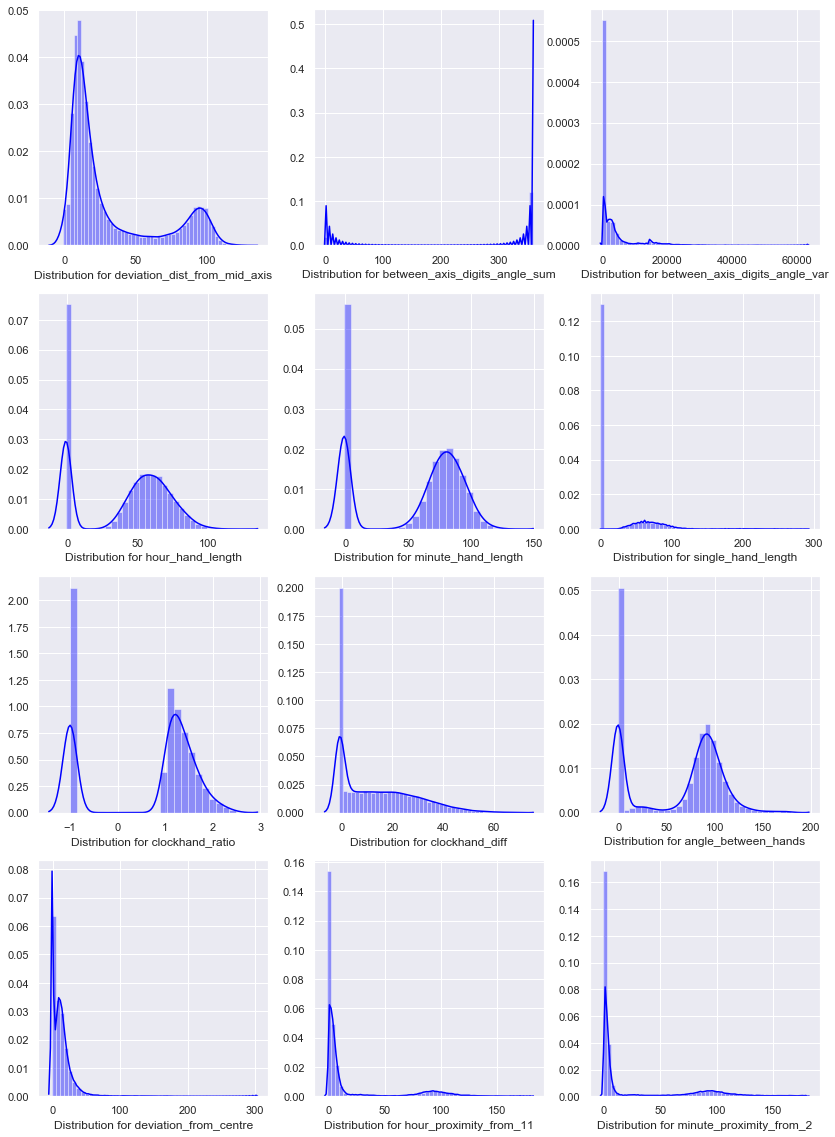

In [ ]:
# Now finally we take a look the remaining feature distribution as they contain large number of distinct values suitable for a distribution plot
plt.figure()
fig, ax = plt.subplots(4, 3,figsize=(14, 20))
cont_features = ['deviation_dist_from_mid_axis',
 'between_axis_digits_angle_sum',
 'between_axis_digits_angle_var',
 'hour_hand_length',
 'minute_hand_length',
 'single_hand_length',
 'clockhand_ratio',
 'clockhand_diff',
 'angle_between_hands',
 'deviation_from_centre',
 'hour_proximity_from_11',
 'minute_proximity_from_2',
 ]
for i,feature in enumerate(cont_features):
    plt.subplot(4, 3,i+1)
    df[feature].fillna(-1,inplace=True)
    sns.distplot(df[feature] , color='blue')
    plt.xlabel(f"Distribution for {feature}", fontsize=12); # plt.legend()
plt.show()


<Figure size 432x288 with 0 Axes>

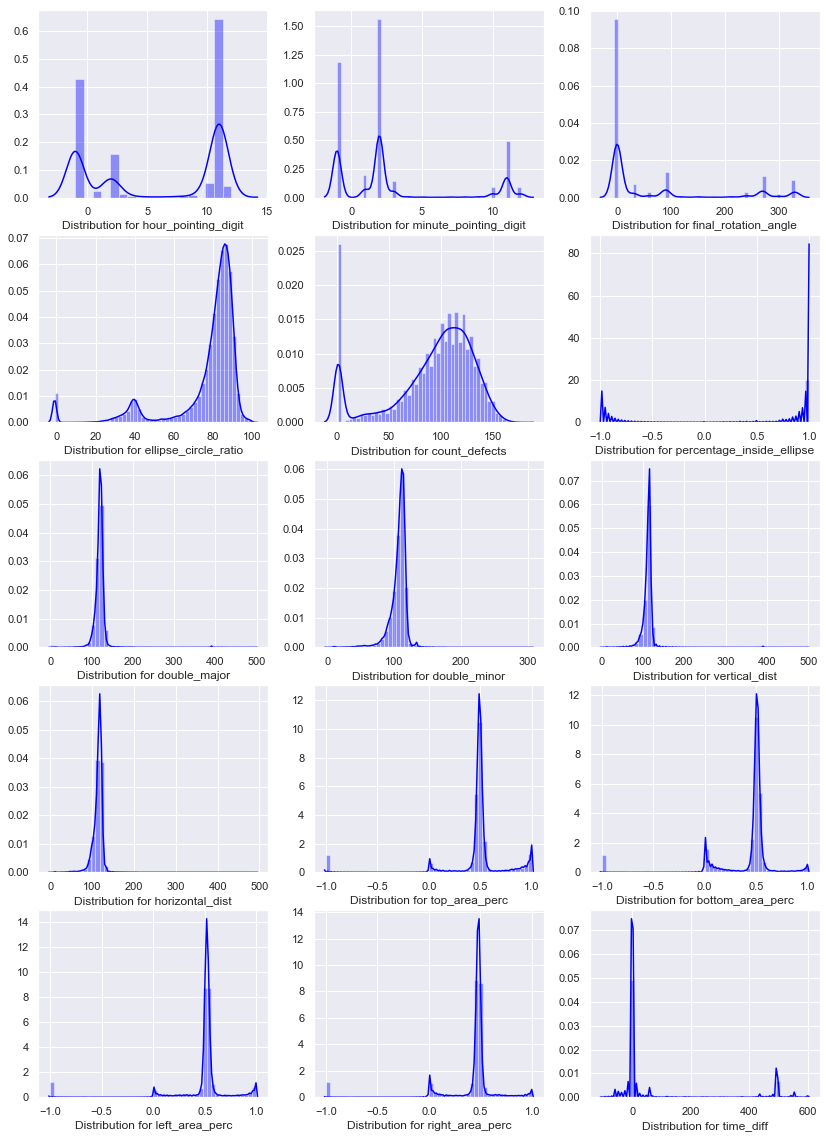

In [ ]:
cont_features = ['hour_pointing_digit',
 'minute_pointing_digit',
 'final_rotation_angle',
 'ellipse_circle_ratio',
 'count_defects',
 'percentage_inside_ellipse',
 'double_major',
 'double_minor',
 'vertical_dist',
 'horizontal_dist',
 'top_area_perc',
 'bottom_area_perc',
 'left_area_perc',
 'right_area_perc',
 'time_diff']
plt.figure()
fig, ax = plt.subplots(5, 3,figsize=(14, 20))
for i,feature in enumerate(cont_features):
    plt.subplot(5, 3,i+1)
    df[feature].fillna(-1,inplace=True)
    sns.distplot(df[feature] , color='blue')
    plt.xlabel(f"Distribution for {feature}", fontsize=12); # plt.legend()
plt.show()


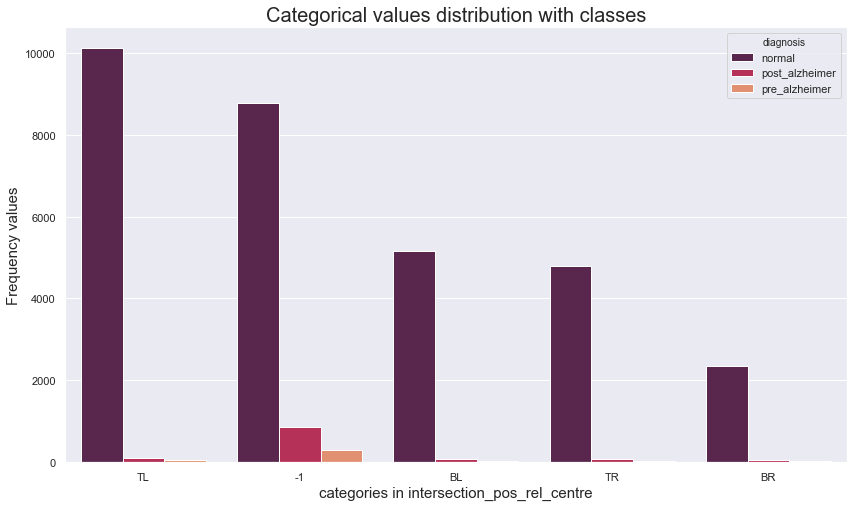

In [ ]:
#one categorical feature with true categorical values

# intersection_pos_rel_centre
feat_col = df['intersection_pos_rel_centre']
feat_col.fillna(-1,inplace=True)
plt.figure(figsize=(14,8))
fig = sns.countplot(data=df, x="intersection_pos_rel_centre",palette='rocket', hue="diagnosis" )
fig.set_xlabel("categories in intersection_pos_rel_centre",size=15)
fig.set_ylabel("Frequency values",size=15)
plt.title('Categorical values distribution with classes',size = 20)
plt.show()

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

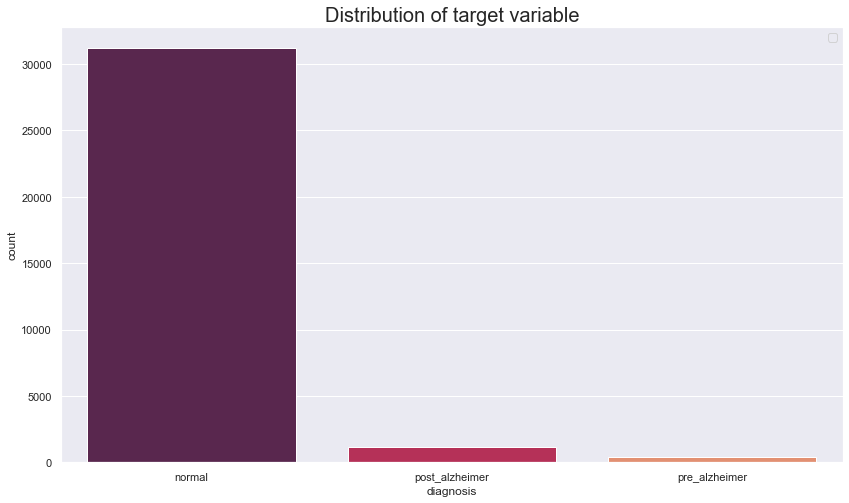

In [ ]:
# we will look into the vfinal target variable to get more insight into the data
plt.figure()
fig, ax = plt.subplots(1, 1,figsize=(14, 8))
sns.countplot(data=df, x='diagnosis',palette='rocket')
plt.title('Distribution of target variable',size = 20)
plt.legend()
plt.show()

We can notice a very large imbalance in data classes which we will address later during feature engineering to make distribution more even

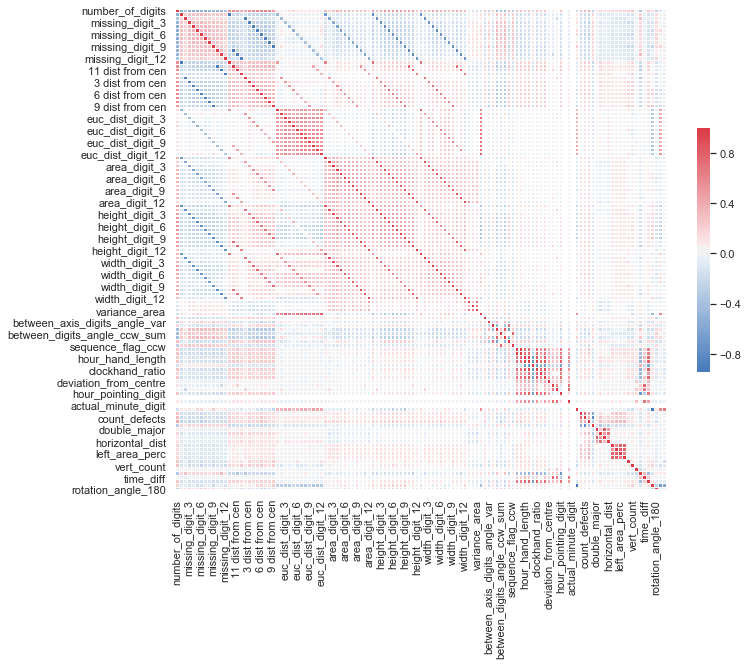

In [ ]:

def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
df.fillna(-1,inplace=True)
CorrMtx(df, dropDuplicates =False)

The correlation plot looks interesting to me as it gives a lot of insight into data, for example we can notice some clustered features are interlinked and having high correlation,others seem to have negative correlation with a few.

## Feature Engineering and Data Preparation

### FE - Part I: Creating new features

In [ ]:
# Now we apply some feature engineering from the conclusions drawn from above EDA
df = df_orig.copy()

# Standardize features
def standardize(df):
    numeric = df.select_dtypes(include=['int64', 'float64'])
    
    # subtracy mean and divide by std
    df[numeric.columns] = (numeric - numeric.mean()) / numeric.std()
    
    return df
 
#we will use -999 to fill up the missing values as of now
df.fillna(-999,inplace=True)

#Create more features from categorical features
df_dummies = pd.get_dummies(df['intersection_pos_rel_centre'], columns='intersection_pos_rel_centre',
                          dummy_na=False).add_prefix('c_i_')
df = df.drop('intersection_pos_rel_centre', axis=1)
df = pd.concat([df, df_dummies], axis=1)

df_dummies = pd.get_dummies(df['hand_count_dummy'], columns='hand_count_dummy',
                          dummy_na=False).add_prefix('c_h_')
df = df.drop('hand_count_dummy', axis=1)
df = pd.concat([df, df_dummies], axis=1)

feat_col = df['final_rotation_angle']
df['rotation_angle_180'] = (feat_col <= 180).astype('int')    #we will also include NaN in this column
df['rotation_angle_360'] = (feat_col > 180).astype('int') 
df = df.drop('final_rotation_angle', axis=1)

features =df.columns[1:].to_list()
features.remove('diagnosis')

#currently we are not using standardize but you can use that by uncommeting below line
# df = standardize(df)

features

['number_of_digits',
 'missing_digit_1',
 'missing_digit_2',
 'missing_digit_3',
 'missing_digit_4',
 'missing_digit_5',
 'missing_digit_6',
 'missing_digit_7',
 'missing_digit_8',
 'missing_digit_9',
 'missing_digit_10',
 'missing_digit_11',
 'missing_digit_12',
 '1 dist from cen',
 '10 dist from cen',
 '11 dist from cen',
 '12 dist from cen',
 '2 dist from cen',
 '3 dist from cen',
 '4 dist from cen',
 '5 dist from cen',
 '6 dist from cen',
 '7 dist from cen',
 '8 dist from cen',
 '9 dist from cen',
 'euc_dist_digit_1',
 'euc_dist_digit_2',
 'euc_dist_digit_3',
 'euc_dist_digit_4',
 'euc_dist_digit_5',
 'euc_dist_digit_6',
 'euc_dist_digit_7',
 'euc_dist_digit_8',
 'euc_dist_digit_9',
 'euc_dist_digit_10',
 'euc_dist_digit_11',
 'euc_dist_digit_12',
 'area_digit_1',
 'area_digit_2',
 'area_digit_3',
 'area_digit_4',
 'area_digit_5',
 'area_digit_6',
 'area_digit_7',
 'area_digit_8',
 'area_digit_9',
 'area_digit_10',
 'area_digit_11',
 'area_digit_12',
 'height_digit_1',
 'height_dig

### FE - Part II: Dealing with Class Imbalance

In [ ]:
#Now we will use one of the methods described in https://www.aicrowd.com/showcase/dealing-with-class-imbalance
#and used by https://www.aicrowd.com/showcase/dealing-with-class-imbalance
#check those out, great notebooks

df_final = pd.concat([
    df.loc[df.diagnosis == 'pre_alzheimer'],
    df.loc[df.diagnosis == 'post_alzheimer'],
    df.loc[df.diagnosis == 'normal'].sample(frac=1/6),
]).reset_index().drop('index', axis=1)



train_data = df_final[features]

target_dict = {'normal':0, 'post_alzheimer':1, 'pre_alzheimer':2}
remap_vals = {0:'normal', 1:'post_alzheimer',2:'pre_alzheimer'}
train_labels = df_final['diagnosis'].map(target_dict).astype('int')
train_data.describe()

,number_of_digits,missing_digit_1,missing_digit_2,missing_digit_3,missing_digit_4,missing_digit_5,missing_digit_6,missing_digit_7,missing_digit_8,missing_digit_9,missing_digit_10,missing_digit_11,missing_digit_12,1 dist from cen,10 dist from cen,11 dist from cen,12 dist from cen,2 dist from cen,3 dist from cen,4 dist from cen,5 dist from cen,6 dist from cen,7 dist from cen,8 dist from cen,9 dist from cen,euc_dist_digit_1,euc_dist_digit_2,euc_dist_digit_3,euc_dist_digit_4,euc_dist_digit_5,euc_dist_digit_6,euc_dist_digit_7,euc_dist_digit_8,euc_dist_digit_9,euc_dist_digit_10,euc_dist_digit_11,euc_dist_digit_12,area_digit_1,area_digit_2,area_digit_3,area_digit_4,area_digit_5,area_digit_6,area_digit_7,area_digit_8,area_digit_9,area_digit_10,area_digit_11,area_digit_12,height_digit_1,height_digit_2,height_digit_3,height_digit_4,height_digit_5,height_digit_6,height_digit_7,height_digit_8,height_digit_9,height_digit_10,height_digit_11,height_digit_12,width_digit_1,width_digit_2,width_digit_3,width_digit_4,width_digit_5,width_digit_6,width_digit_7,width_digit_8,width_digit_9,width_digit_10,width_digit_11,width_digit_12,variance_width,variance_height,variance_area,deviation_dist_from_mid_axis,between_axis_digits_angle_sum,between_axis_digits_angle_var,between_digits_angle_cw_sum,between_digits_angle_cw_var,between_digits_angle_ccw_sum,between_digits_angle_ccw_var,sequence_flag_cw,sequence_flag_ccw,number_of_hands,hour_hand_length,minute_hand_length,single_hand_length,clockhand_ratio,clockhand_diff,angle_between_hands,deviation_from_centre,hour_proximity_from_11,minute_proximity_from_2,hour_pointing_digit,actual_hour_digit,minute_pointing_digit,actual_minute_digit,ellipse_circle_ratio,count_defects,percentage_inside_ellipse,pred_tremor,double_major,double_minor,vertical_dist,horizontal_dist,top_area_perc,bottom_area_perc,left_area_perc,right_area_perc,hor_count,vert_count,eleven_ten_error,other_error,time_diff,centre_dot_detect,c_i_-999,c_i_BL,c_i_BR,c_i_TL,c_i_TR,c_h_-999.0,c_h_1.0,c_h_2.0,c_h_3.0,rotation_angle_180,rotation_angle_360
count,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.00000,6770.00000,6770.000000,6770.000000,6770.000000,6.770000e+03,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.0,6770.000000,6770.0,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000,6770.000000
mean,2.205465,-7.251551,-7.361300,-7.353767,-7.318168,-7.284786,-7.345495,-7.356721,-7.366765,-7.297932,-7.329985,-7.308715,-7.380059,-22.195355,85.820879,57.993805,158.878009,115.693513,95.045635,45.866884,0.618808,95.241264,122.723867,138.123734,49.233093,-260.504807,-144.774563,-150.807905,-188.369042,-224.448232,-163.786662,-151.936662,-142.008238,-210.628043,-176.689947,-199.641637,-127.947171,1403.2

We mainly used very simple feature engineering as of now but in susequent notebooks (probably part 2 or workthrough blog/video), I'll explain more methods of feature engineering and try to dig deeper into how we can leverage the different FE techniques, now let's focus on hyper parameter optimization

### Redundant Code

In [ ]:
# features = df_orig.columns[1:-1].to_list()
# cont_f = []
# for f in features:
#     print(f" {f} is having : {df[f].nunique()}")
#     if df[f].nunique() >= 7:
#         cont_f.append(f)

In [ ]:
# train = df[features]
# train = train.drop(['intersection_pos_rel_centre'],axis = 1)
# train.fillna(-1, inplace=True)
# # train_data = (train_data-train_data.mean())/train_data.std()
# train.describe()

In [ ]:
# target_values = list(df_orig['diagnosis'].unique())
# target_col = 'diagnosis'
# df_pos = df_orig[df_orig[target_col].isin(target_values[1:])]
# nb_pos = df_pos.shape[0]
# nb_neg = nb_pos*2
# df_neg = df_orig[df_orig[target_col] == "normal"].sample(n=nb_neg, random_state=42)
# df_samples = pd.concat([df_pos, df_neg]).sample(frac=1).reset_index(drop=True)

# train_data = df_samples[features]
# train_data.drop(['intersection_pos_rel_centre'],axis = 1, inplace=True)
# train_data.fillna(-1, inplace=True)
# # train_data = (train_data-train_data.mean())/train_data.std()
# train_data.describe()

In [ ]:
# df_orig['diagnosis'].unique()

In [ ]:
# target_dict = {'normal':0, 'post_alzheimer':1, 'pre_alzheimer':2}
# remap_vals = {0:'normal', 1:'post_alzheimer',2:'pre_alzheimer'}
# train_labels = df_samples['diagnosis'].map(target_dict).astype('int')
# train_labels

## Train your model

### Part I: Hyper-parameter Optimization using Optuna

In [ ]:
#use 10% train data for validation while tuning hyperparamters
X_train, X_test, Y_train, y_test = train_test_split(train_data, train_labels, test_size=0.1, random_state=42)


#For tuning hyperparameters we are using default sampler and pruner of Optunafor simplicity, you can find moer info about them 
#at https://github.com/optuna/optuna/ [ps: I am one of the contributors so feel free to ask any queries or give feedback]
import optuna


def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(train_data, train_labels, test_size=0.1, random_state=42)
    dtrain = xgb.DMatrix(train_x, label=train_y)
    dvalid = xgb.DMatrix(valid_x, label=valid_y)

    param = {
        "verbosity": 0,
        "eval_metric":"mlogloss",
        "use_label_encoder":False,
        # L2 regularization weight.
        "reg_lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "reg_alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 1.0, log=True),
        "max_depth": trial.suggest_int("max_depth", 8, 20),
        "n_estimators": trial.suggest_int("n_estimators", 50, 200),
    }
    model = xgb.XGBClassifier(**param)
    model.fit(train_x,train_y)
    pred_labels = model.predict_proba(valid_x)
    return log_loss(valid_y, pred_labels)
    

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2021-05-12 15:59:38,641] A new study created in memory with name: no-name-22701c7a-c3c0-4464-ad97-3aff52082ff5
[I 2021-05-12 15:59:43,741] Trial 0 finished with value: 0.9195696366414362 and parameters: {'lambda': 1.6349867526984736e-08, 'alpha': 1.3660860062064696e-06, 'subsample': 0.20079966534758473, 'colsample_bytree': 0.37119951076379953, 'learning_rate': 0.0038901255071057336, 'max_depth': 20, 'n_estimators': 70}. Best is trial 0 with value: 0.9195696366414362.
[I 2021-05-12 16:00:04,196] Trial 1 finished with value: 0.9635377036768014 and parameters: {'lambda': 0.004574820718124166, 'alpha': 2.9722885826155193e-05, 'subsample': 0.9208011834964993, 'colsample_bytree': 0.7567158878933506, 'learning_rate': 0.00129718056690989, 'max_depth': 11, 'n_estimators': 146}. Best is trial 0 with value: 0.9195696366414362.
[I 2021-05-12 16:00:23,199] Trial 2 finished with value: 0.6012728019910514 and parameters: {'lambda': 0.06532063043901398, 'alpha': 7.219229185669857e-08, 'subsample': 

[I 2021-05-12 16:08:54,557] Trial 45 finished with value: 0.6342182246585716 and parameters: {'lambda': 1.1354052583809866e-08, 'alpha': 0.0007241911751782543, 'subsample': 0.8227250109167384, 'colsample_bytree': 0.7082449288272578, 'learning_rate': 0.015151960040659704, 'max_depth': 10, 'n_estimators': 83}. Best is trial 8 with value: 0.5439758313217227.
[I 2021-05-12 16:09:20,560] Trial 46 finished with value: 0.5718747880750031 and parameters: {'lambda': 5.271621351182447e-08, 'alpha': 0.003749125413858633, 'subsample': 0.8868298808233133, 'colsample_bytree': 0.867231453380404, 'learning_rate': 0.02473438018044617, 'max_depth': 13, 'n_estimators': 149}. Best is trial 8 with value: 0.5439758313217227.
[I 2021-05-12 16:09:39,029] Trial 47 finished with value: 0.6066211906527933 and parameters: {'lambda': 2.5434925432329653e-05, 'alpha': 0.01830860135864865, 'subsample': 0.6706894847247397, 'colsample_bytree': 0.945898504387016, 'learning_rate': 0.04864244304813086, 'max_depth': 12, 'n

[I 2021-05-12 16:13:16,966] Trial 91 finished with value: 0.5474748504313708 and parameters: {'lambda': 0.07379241876467516, 'alpha': 1.3086158444928505e-06, 'subsample': 0.2013149371376218, 'colsample_bytree': 0.21711574870865735, 'learning_rate': 0.028177558449633468, 'max_depth': 20, 'n_estimators': 107}. Best is trial 63 with value: 0.532580343227795.
[I 2021-05-12 16:13:21,655] Trial 92 finished with value: 0.5589636626874854 and parameters: {'lambda': 0.9924600023337846, 'alpha': 1.4478910472321209e-06, 'subsample': 0.23754518211674278, 'colsample_bytree': 0.29511020881676076, 'learning_rate': 0.019762485413860297, 'max_depth': 20, 'n_estimators': 117}. Best is trial 63 with value: 0.532580343227795.
[I 2021-05-12 16:13:25,492] Trial 93 finished with value: 0.6191651385106928 and parameters: {'lambda': 0.16305634843175618, 'alpha': 4.237776388516178e-06, 'subsample': 0.21777905333493716, 'colsample_bytree': 0.22001140848856016, 'learning_rate': 0.013591279822230651, 'max_depth': 

Best trial:
  Value: 0.532580343227795
  Params: 
    lambda: 0.0021482290862969993
    alpha: 2.4438454633711583e-08
    subsample: 0.2658469152130181
    colsample_bytree: 0.26317295728868534
    learning_rate: 0.0419633326885014
    max_depth: 18
    n_estimators: 85


### Part II:Using best parameters to train XGBoost

In [ ]:
#Task remaining, use stratified folds with Kfolds for training.

params = {'lambda': 0.0021482290862969993,
 'alpha': 2.4438454633711583e-08,
 'subsample': 0.2658469152130181,
 'colsample_bytree': 0.26317295728868534,
 'learning_rate': 0.0419633326885014,
 'max_depth': 18,
 'n_estimators': 85}

X_train, X_test, Y_train, y_test = train_test_split(train_data, train_labels, test_size=0.1, random_state=42)
# X_train, X_test, Y_train, y_test = train_test_split(train, y_train, test_size=0.1, random_state=42)
# model = xgb.XGBClassifier(**{'colsample_bylevel': 0.9, 'learning_rate': 0.05, 'max_depth': 20, 'n_estimators': 200,
#                                  'reg_lambda': 15, 'eval_metric':'mlogloss'
#                              }).fit(X_train, Y_train,eval_set=[(X_test,y_test)],verbose=True,early_stopping_rounds=10)
model = xgb.XGBClassifier(**params).fit(X_train, Y_train,eval_set=[(X_test,y_test)],verbose=True,early_stopping_rounds=10)

[0]	validation_0-mlogloss:1.06489
[1]	validation_0-mlogloss:1.03391
[2]	validation_0-mlogloss:1.00446
[3]	validation_0-mlogloss:0.97824
[4]	validation_0-mlogloss:0.95265
[5]	validation_0-mlogloss:0.92869
[6]	validation_0-mlogloss:0.90672
[7]	validation_0-mlogloss:0.88671
[8]	validation_0-mlogloss:0.86817
[9]	validation_0-mlogloss:0.84989
[10]	validation_0-mlogloss:0.83220
[11]	validation_0-mlogloss:0.81559
[12]	validation_0-mlogloss:0.79999
[13]	validation_0-mlogloss:0.78577
[14]	validation_0-mlogloss:0.76979
[15]	validation_0-mlogloss:0.75615
[16]	validation_0-mlogloss:0.74430
[17]	validation_0-mlogloss:0.73394
[18]	validation_0-mlogloss:0.72340
[19]	validation_0-mlogloss:0.71213
[20]	validation_0-mlogloss:0.70240
[21]	validation_0-mlogloss:0.69234
[22]	validation_0-mlogloss:0.68344
[23]	validation_0-mlogloss:0.67649
[24]	validation_0-mlogloss:0.66963
[25]	validation_0-mlogloss:0.66135
[26]	validation_0-mlogloss:0.65426
[27]	validation_0-mlogloss:0.64670
[28]	validation_0-mlogloss:0.6

In [ ]:
test_y_orig = model.predict_proba(X_test)
print(test_y_orig.shape)

test_y = np.argmax(test_y_orig,axis=1)
print("acc",accuracy_score(y_test, test_y))
print("f1_score",f1_score(y_test,test_y, labels=[0,1,2],average='macro'))
print("logLoss",log_loss(y_test,test_y_orig))

(677, 3)
acc 0.7858197932053176
f1_score 0.41304707411345726
logLoss 0.5318208347560296


## Save your trained model

In [ ]:
# model.save()
Filename = f'{AICROWD_ASSETS_DIR}/model_xgb_exp_4-2.pkl'

pickle.dump(model, open(Filename, "wb"))

# Prediction phase 🔎

Please make sure to save the weights from the training section in your assets directory and load them in this section

In [ ]:
# model = load_model_from_assets_dir(AIcrowdConfig.ASSETS_DIR)
Filename = f'{AICROWD_ASSETS_DIR}/model_xgb_exp_4-2.pkl'
# load model from file
loaded_model = pickle.load(open(Filename, "rb"))


## Load test data

In [ ]:
test_df = pd.read_csv(AICROWD_DATASET_PATH)
test_df.head()

,row_id,number_of_digits,missing_digit_1,missing_digit_2,missing_digit_3,missing_digit_4,missing_digit_5,missing_digit_6,missing_digit_7,missing_digit_8,missing_digit_9,missing_digit_10,missing_digit_11,missing_digit_12,1 dist from cen,10 dist from cen,11 dist from cen,12 dist from cen,2 dist from cen,3 dist from cen,4 dist from cen,5 dist from cen,6 dist from cen,7 dist from cen,8 dist from cen,9 dist from cen,euc_dist_digit_1,euc_dist_digit_2,euc_dist_digit_3,euc_dist_digit_4,euc_dist_digit_5,euc_dist_digit_6,euc_dist_digit_7,euc_dist_digit_8,euc_dist_digit_9,euc_dist_digit_10,euc_dist_digit_11,euc_dist_digit_12,area_digit_1,area_digit_2,area_digit_3,area_digit_4,area_digit_5,area_digit_6,area_digit_7,area_digit_8,area_digit_9,area_digit_10,area_digit_11,area_digit_12,height_digit_1,height_digit_2,height_digit_3,height_digit_4,height_digit_5,height_digit_6,height_digit_7,height_digit_8,height_digit_9,height_digit_10,height_digit_11,height_digit_12,width_digit_1,width_digit_2,width_digit_3,width_digit_4,width_digit_5,width_digit_6,width_digit_7,width_digit_8,width_digit_9,width_digit_10,width_digit_11,width_digit_12,variance_width,variance_height,variance_area,deviation_dist_from_mid_axis,between_axis_digits_angle_sum,between_axis_digits_angle_var,between_digits_angle_cw_sum,between_digits_angle_cw_var,between_digits_angle_ccw_sum,between_digits_angle_ccw_var,sequence_flag_cw,sequence_flag_ccw,number_of_hands,hand_count_dummy,hour_hand_length,minute_hand_length,single_hand_length,clockhand_ratio,clockhand_diff,angle_between_hands,deviation_from_centre,intersection_pos_rel_centre,hour_proximity_from_11,minute_proximity_from_2,hour_pointing_digit,actual_hour_digit,minute_pointing_digit,actual_minute_digit,final_rotation_angle,ellipse_circle_ratio,count_defects,percentage_inside_ellipse,pred_tremor,double_major,double_minor,vertical_dist,horizontal_dist,top_area_perc,bottom_area_perc,left_area_perc,right_area_perc,hor_count,vert_count,eleven_ten_error,other_error,time_diff,centre_dot_detect
0,LA9JQ1JZMJ9D2MBZV,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,314.649805,NaN,408.240125,323.348110,321.706776,264.496219,203.330396,205.081081,282.015071,343.657169,416.716030,435.900218,6.119758,25.267069,17.29,6.006505,10.246421,14.43,4.778738,43.124586,46.80,NaN,67.293643,3.90,2001.0,4180.0,6318.0,6528.0,6370.0,8127.0,5610.0,3312.0,9372.0,NaN,3500.0,6336.0,69.0,95.0,117.0,128.0,98.0,129.0,102.0,69.0,142.0,NaN,70.0,72.0,29.0,44.0,54.0,51.0,65.0,63.0,55.0,48.0,66.0,NaN,50.0,88.0,225.618182,730.963636,4.773900e+06,20.605000,360.0,854.199907,NaN,8623.343673,NaN,8623.343673,0.0,0.0,3.0,3.0,NaN,NaN,183.844962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,2,0.0,84.753550,106,1.000000,0,118.971780,106.379109,111.720745,112.581495,0.500272,0.499368,0.553194,0.446447,0,0,0,1,NaN,NaN
1,PSSRCWAPTAG72A1NT,6.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,235.663425,NaN,NaN,325.616723,NaN,NaN,288.257264,292.027396,334.951116,370.648756,NaN,NaN,22.88,NaN,NaN,72.80,72.787316,20.133319,96.33,NaN,60.955820,NaN,NaN,NaN,12390.0,NaN,NaN,8848.0,5632.0,10434.0,7739.0,NaN,11834.0,NaN,NaN,NaN,118.0,NaN,NaN,79.0,64.0,94.0,71.0,NaN,97.0,NaN,NaN,NaN,105.0,NaN,NaN,112.0,88.0,111.0,109.0,NaN,122.0,NaN,126.166667,391.766667,6.631428e+06,64.003333,NaN,5998.258485,NaN,16273.285540,NaN,16273.285540,0.0,0.0,1.0,1.0,NaN,NaN,99.180032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,2,180.0,73.359021,99,1.000000,0,123.968624,99.208099,104.829045,114.955335,0.572472,0.427196,0.496352,0.503273,0,1,0,1,NaN,NaN
2,GCTODIZJB42VCBZRZ,11.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,438.627689,429.789774,447.455305,447.033835,409.185166,361.946474,359.824957,NaN,345.937133,366.201106,375.225266,427.154831,112.333641,100.371900,86.45,86.234478,NaN,89.57,94.556399,97.331146,111.02,111.411562,116.061975,116.22,3182.0,4473.0,4554.0,5032.0,NaN,5355.0,4148.0,4320.0,4420.0,7290.0,2726.0,5184.0,43.0,71.0,69.0,68.0,NaN,51.0,68.0,48.0,52.0,81.0,47.0,81.0,74.0,63.0,66.0,74.0,NaN,105.0,6

## Generate predictions

In [ ]:

#Test set Pre processing
test_df.fillna(-999,inplace=True)

#Create more features from categorical features
df_dummies = pd.get_dummies(test_df['intersection_pos_rel_centre'], columns='intersection_pos_rel_centre',
                          dummy_na=False).add_prefix('c_i_')
test_df = test_df.drop('intersection_pos_rel_centre', axis=1)
test_df = pd.concat([test_df, df_dummies], axis=1)

df_dummies = pd.get_dummies(test_df['hand_count_dummy'], columns='hand_count_dummy',
                          dummy_na=False).add_prefix('c_h_')
test_df = test_df.drop('hand_count_dummy', axis=1)
test_df = pd.concat([test_df, df_dummies], axis=1)

feat_col = test_df['final_rotation_angle']
test_df['rotation_angle_180'] = (feat_col <= 180).astype('int')    #we will also include NaN in this columntest_
test_df['rotation_angle_360'] = (feat_col > 180).astype('int') 
test_df = test_df.drop('final_rotation_angle', axis=1)

features =test_df.columns[1:].to_list()
# test_data = (test_data-test_data.mean())/test_data.std()
test_df.describe()

,number_of_digits,missing_digit_1,missing_digit_2,missing_digit_3,missing_digit_4,missing_digit_5,missing_digit_6,missing_digit_7,missing_digit_8,missing_digit_9,missing_digit_10,missing_digit_11,missing_digit_12,1 dist from cen,10 dist from cen,11 dist from cen,12 dist from cen,2 dist from cen,3 dist from cen,4 dist from cen,5 dist from cen,6 dist from cen,7 dist from cen,8 dist from cen,9 dist from cen,euc_dist_digit_1,euc_dist_digit_2,euc_dist_digit_3,euc_dist_digit_4,euc_dist_digit_5,euc_dist_digit_6,euc_dist_digit_7,euc_dist_digit_8,euc_dist_digit_9,euc_dist_digit_10,euc_dist_digit_11,euc_dist_digit_12,area_digit_1,area_digit_2,area_digit_3,area_digit_4,area_digit_5,area_digit_6,area_digit_7,area_digit_8,area_digit_9,area_digit_10,area_digit_11,area_digit_12,height_digit_1,height_digit_2,height_digit_3,height_digit_4,height_digit_5,height_digit_6,height_digit_7,height_digit_8,height_digit_9,height_digit_10,height_digit_11,height_digit_12,width_digit_1,width_digit_2,width_digit_3,width_digit_4,width_digit_5,width_digit_6,width_digit_7,width_digit_8,width_digit_9,width_digit_10,width_digit_11,width_digit_12,variance_width,variance_height,variance_area,deviation_dist_from_mid_axis,between_axis_digits_angle_sum,between_axis_digits_angle_var,between_digits_angle_cw_sum,between_digits_angle_cw_var,between_digits_angle_ccw_sum,between_digits_angle_ccw_var,sequence_flag_cw,sequence_flag_ccw,number_of_hands,hour_hand_length,minute_hand_length,single_hand_length,clockhand_ratio,clockhand_diff,angle_between_hands,deviation_from_centre,hour_proximity_from_11,minute_proximity_from_2,hour_pointing_digit,actual_hour_digit,minute_pointing_digit,actual_minute_digit,ellipse_circle_ratio,count_defects,percentage_inside_ellipse,pred_tremor,double_major,double_minor,vertical_dist,horizontal_dist,top_area_perc,bottom_area_perc,left_area_perc,right_area_perc,hor_count,vert_count,eleven_ten_error,other_error,time_diff,centre_dot_detect,c_i_-999,c_i_BL,c_i_BR,c_i_TL,c_i_TR,c_h_-999.0,c_h_1.0,c_h_2.0,c_h_3.0,rotation_angle_180,rotation_angle_360
count,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,3.620000e+02,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.0,362.000000,362.0,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000
mean,1.162983,-7.991713,-8.102210,-8.107735,-8.030387,-8.019337,-8.088398,-8.082873,-8.093923,-7.991713,-8.044199,-8.058011,-8.091160,-45.680436,31.642033,55.295891,102.210829,92.376567,90.287175,-13.501951,-26.706205,79.147537,85.511666,99.085287,-30.102850,-275.058934,-156.037805,-150.985663,-232.805849,-248.223235,-176.613370,-186.233368,-173.101758,-278.854475,-218.951005,-209.023783,-175.511602,1387.035912,3198.044199,3905.262431,3924.861878,4630.842541,4684.417127,3675.535912,4496.571823,3633.817680,4703.665746,3817.71270

In [ ]:
test_data = test_df[features]
preds = loaded_model.predict_proba(test_data)
# preds

In [ ]:
# (preds==0).astype(int)

In [ ]:
check_val =False

if check_val:
    
    y_true = pd.read_csv(AICROWD_DATASET_PATH.replace("validation", "validation_ground_truth"))
    y_test = y_true['diagnosis'].map(target_dict).values
    preds_2 = np.argmax(preds,axis=1)
    
    print("acc",accuracy_score(y_test, preds_2))
    print("f1_score",f1_score(y_test,preds_2, labels=[0,1,2],average='macro'))
    print("logLoss",log_loss(y_test,preds))

In [ ]:

# predictions = {
#     "row_id": test_data["row_id"].values,
#     "normal_diagnosis_probability": (preds==0).astype(int),
#     "post_alzheimer_diagnosis_probability":(preds==1).astype(int),
#     "pre_alzheimer_diagnosis_probability": (preds==2).astype(int),
# }


predictions = {
    "row_id": test_df["row_id"].values,
    "normal_diagnosis_probability": preds[:,0],
    "post_alzheimer_diagnosis_probability":preds[:,1],
    "pre_alzheimer_diagnosis_probability": preds[:,2],
}

predictions_df = pd.DataFrame.from_dict(predictions)

## Save predictions 📨

In [ ]:
predictions_df.to_csv(AICROWD_PREDICTIONS_PATH, index=False)

# Submit to AIcrowd 🚀

**NOTE: PLEASE SAVE THE NOTEBOOK BEFORE SUBMITTING IT (Ctrl + S)**

In [ ]:
%env DATASET_PATH=$AICROWD_DATASET_PATH
    --assets-dir $AICROWD_ASSETS_DIR \
    --challenge addi-alzheimers-detection-challenge

env: DATASET_PATH=Z:/challenge-data/validation.csv
Using notebook: C:\Users\workspace\EDA, FE and HPO - All you need (LB - 0.640).ipynb for submission...
Removing existing files from submission directory...
Scrubbing API keys from the notebook...
Validating the submission...
Executing install.ipynb...
Executing predict.ipynb...
submission.zip --------------------- 100.0% • 24.2/24.2 MB • 2.2 MB/s • 0:00:00                                                 +-------------------------+                                                 
                                                 | Successfully submitted! |                                                 
                                                 +-------------------------+                                                 
                                                       Important links                                                       
+--------------------------------------------------------------------------------------

[NbConvertApp] Converting notebook C:\Users\workspace\submission/install.ipynb to notebook
[NbConvertApp] Executing notebook with kernel: python
[NbConvertApp] Writing 1080 bytes to C:\Users\workspace\submission\install.nbconvert.ipynb
[NbConvertApp] Converting notebook C:\Users\workspace\submission/predict.ipynb to notebook
[NbConvertApp] Executing notebook with kernel: python
[NbConvertApp] Writing 116528 bytes to C:\Users\workspace\submission\predict.nbconvert.ipynb


### Conclusion:
This notebook demonstrates exploratory data analysis using which we can perfrom some feature engineering. Next part explains the use of Optuna for hyper-parameter optimization of Xgboost model. My idea is to further elaborate the feature engineering and ensemble in a follow-up discussion/blog walkthrough thread. I'll also try to have a good stratifiedKfolds cross validation as I believe current validation is a bit unsatisfying to me. Stay tuned for next part and if you find this notebook useful please don't forget to hit the like button on top of the notebook.

**References:**
* https://www.aicrowd.com/showcase/end-to-end-simple-solution-9-models-data-imbalance
* https://www.aicrowd.com/showcase/dealing-with-class-imbalance
* https://www.aicrowd.com/showcase/simple-eda-and-baseline-lb-0-66-0-616-with-a-magic